In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


np.set_printoptions(suppress=True)
%config InlineBackend.figure_format = 'retina'

# Data

The dataset for this project has been taken from Kaggle: https://www.kaggle.com/datasets/prachi13/employeeattritionrate

Data Description
The dataset consists of 14710 observations and 8 variables. Each row in dataset represents an employee; each column contains employee attributes:

**Independent Variables**

- Age: Age of employees,
- Department: Department of work,
- Distance from home,
- Education: 1-Below College; 2-College; 3-Bachelor; 4-Master; 5-Doctor;
- Education Field
- Environment Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- Job Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- Marital Status,
- Monthly Income,
- Num Companies Worked: Number of companies worked prior to IBM,
- Work Life Balance: 1-Bad; 2-Good; 3-Better; 4-Best;
- Years At Company: Current years of service in IBM

**Dependent Variable**

- **Attrition: Employee attrition status(0 or 1)**

## Objectives

1. Exploratory Data Analysis
2. Inference
3. Prediction

## Load Data

In [2]:
df = pd.read_csv('Attrition Data 2.csv')

In [3]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
df['Attrition'] = df.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)

## Basic Statistics

**Some Observations**

- No missing data in numeric columns. All have a count of 1470
- Only 16% attrition (skewed dataset as expected)

In [5]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,0.367863,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


# A. Exploratory Data Analysis (EDA)

In [6]:
df.dtypes

Age                         int64
Attrition                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

0    1233
1     237
Name: Attrition, dtype: int64


<Axes: >

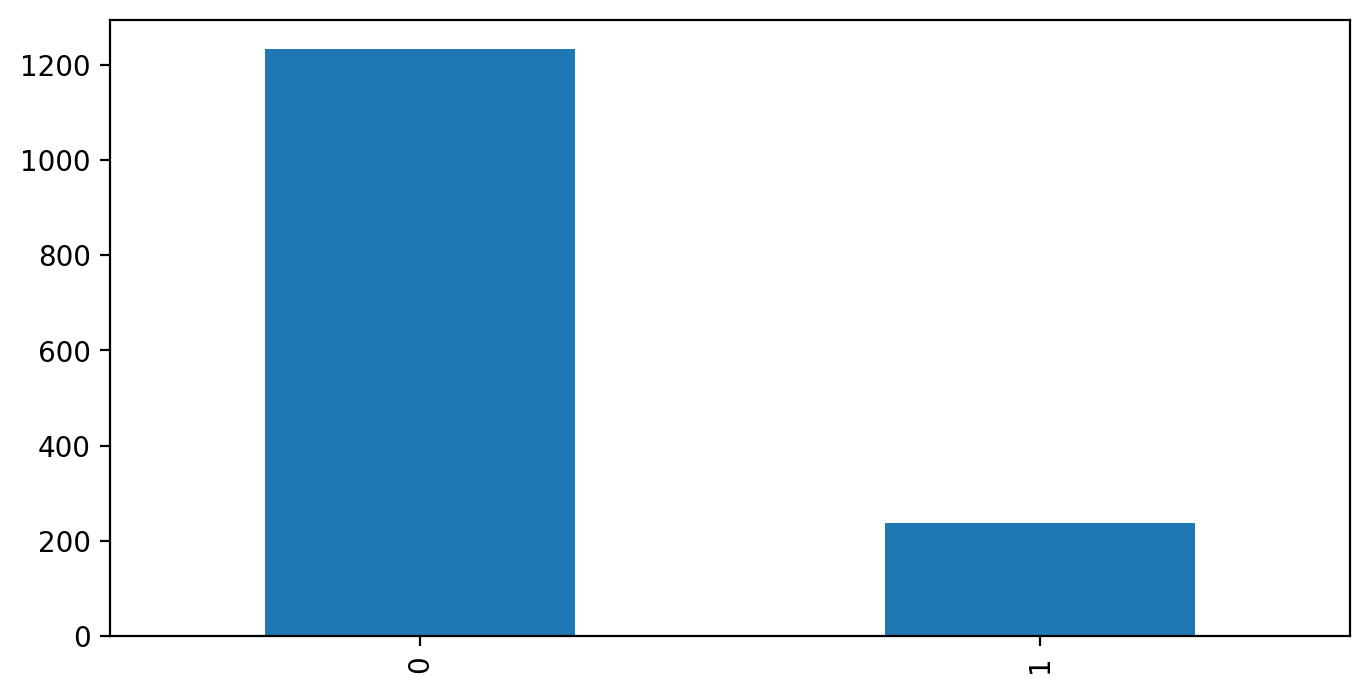

In [7]:
print(df.Attrition.value_counts())
df.Attrition.value_counts().sort_index().plot(kind='bar', figsize=(8, 4))

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


<Axes: >

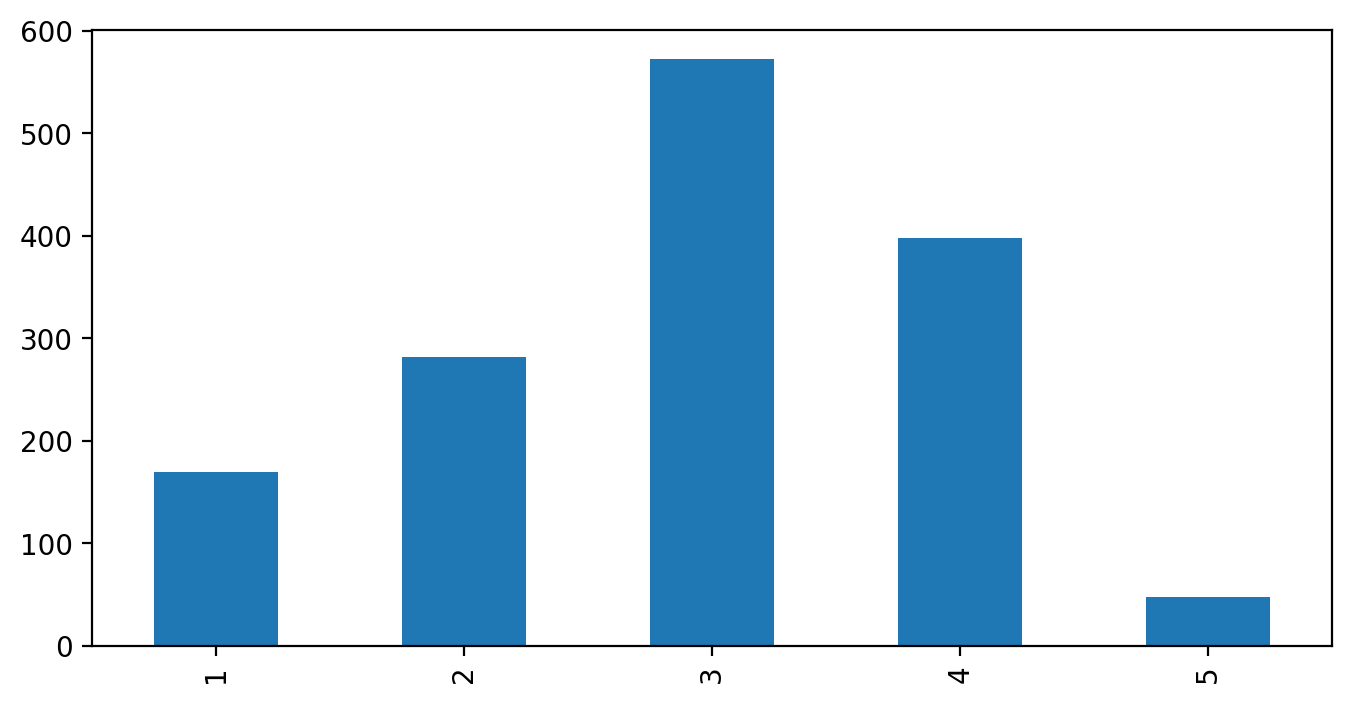

In [8]:
print(df.Education.value_counts())
df.Education.value_counts().sort_index().plot(kind='bar', figsize=(8, 4))

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


<Axes: >

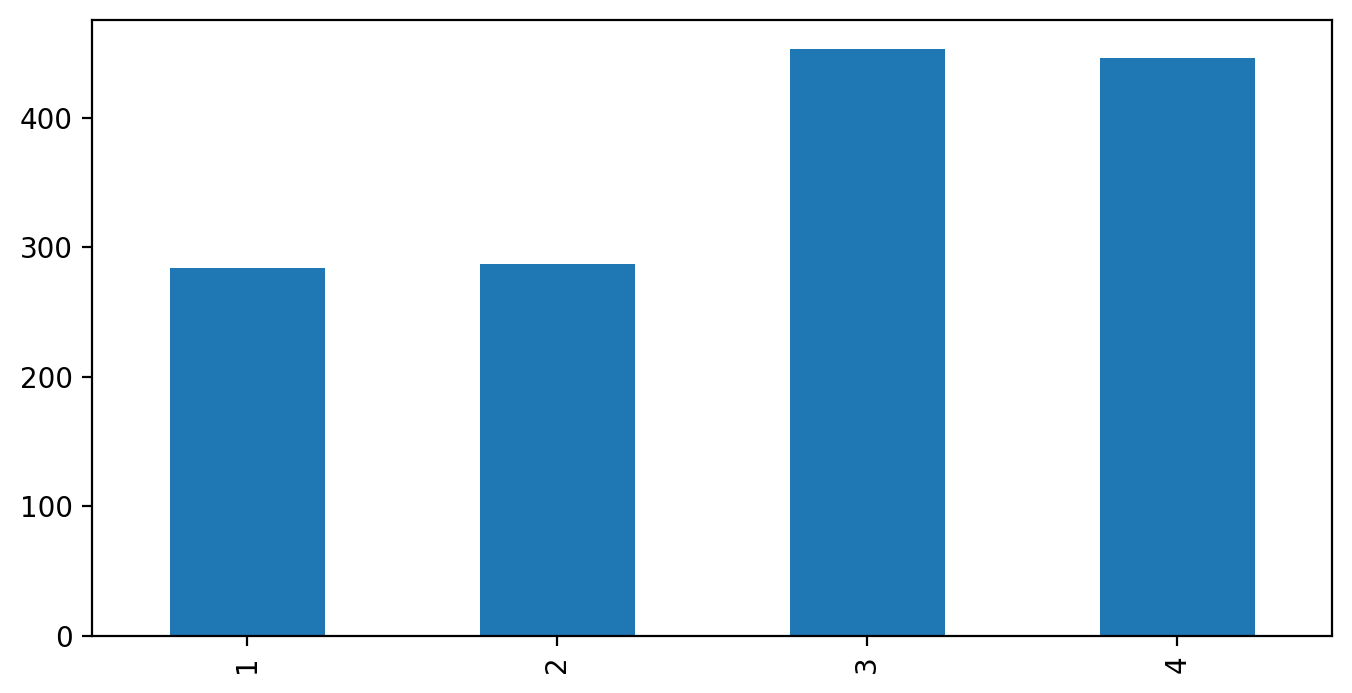

In [9]:
print(df.EnvironmentSatisfaction.value_counts())
df.EnvironmentSatisfaction.value_counts().sort_index().plot(kind='bar', figsize=(8, 4))

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


<Axes: >

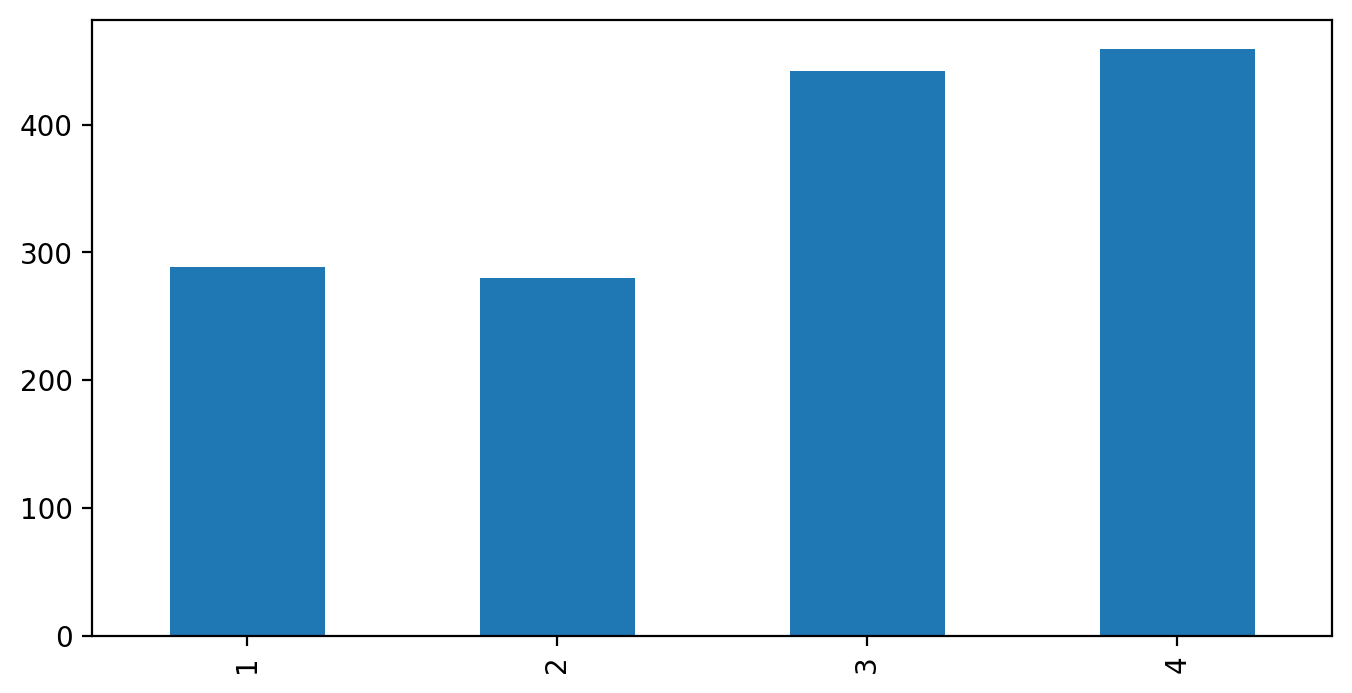

In [10]:
print(df.JobSatisfaction.value_counts())
df.JobSatisfaction.value_counts().sort_index().plot(kind='bar', figsize=(8, 4))

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


<Axes: >

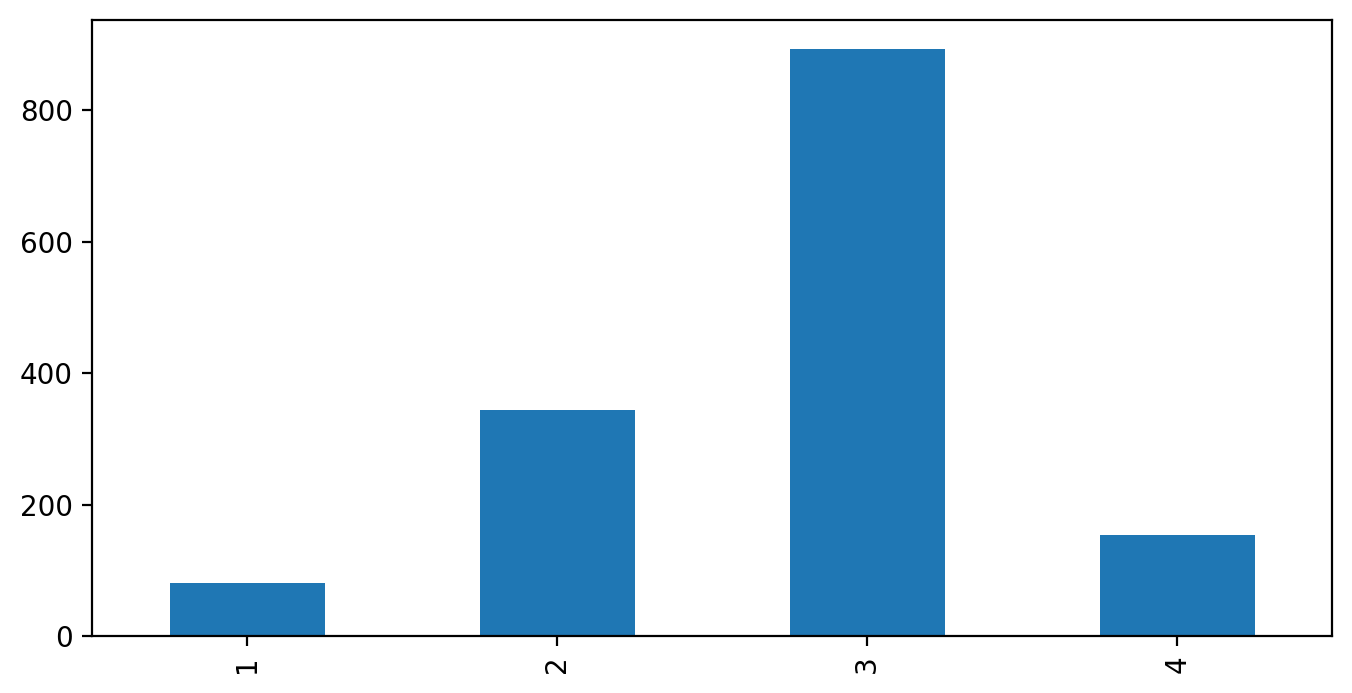

In [11]:
print(df.WorkLifeBalance.value_counts())
df.WorkLifeBalance.value_counts().sort_index().plot(kind='bar', figsize=(8, 4))

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<Axes: >

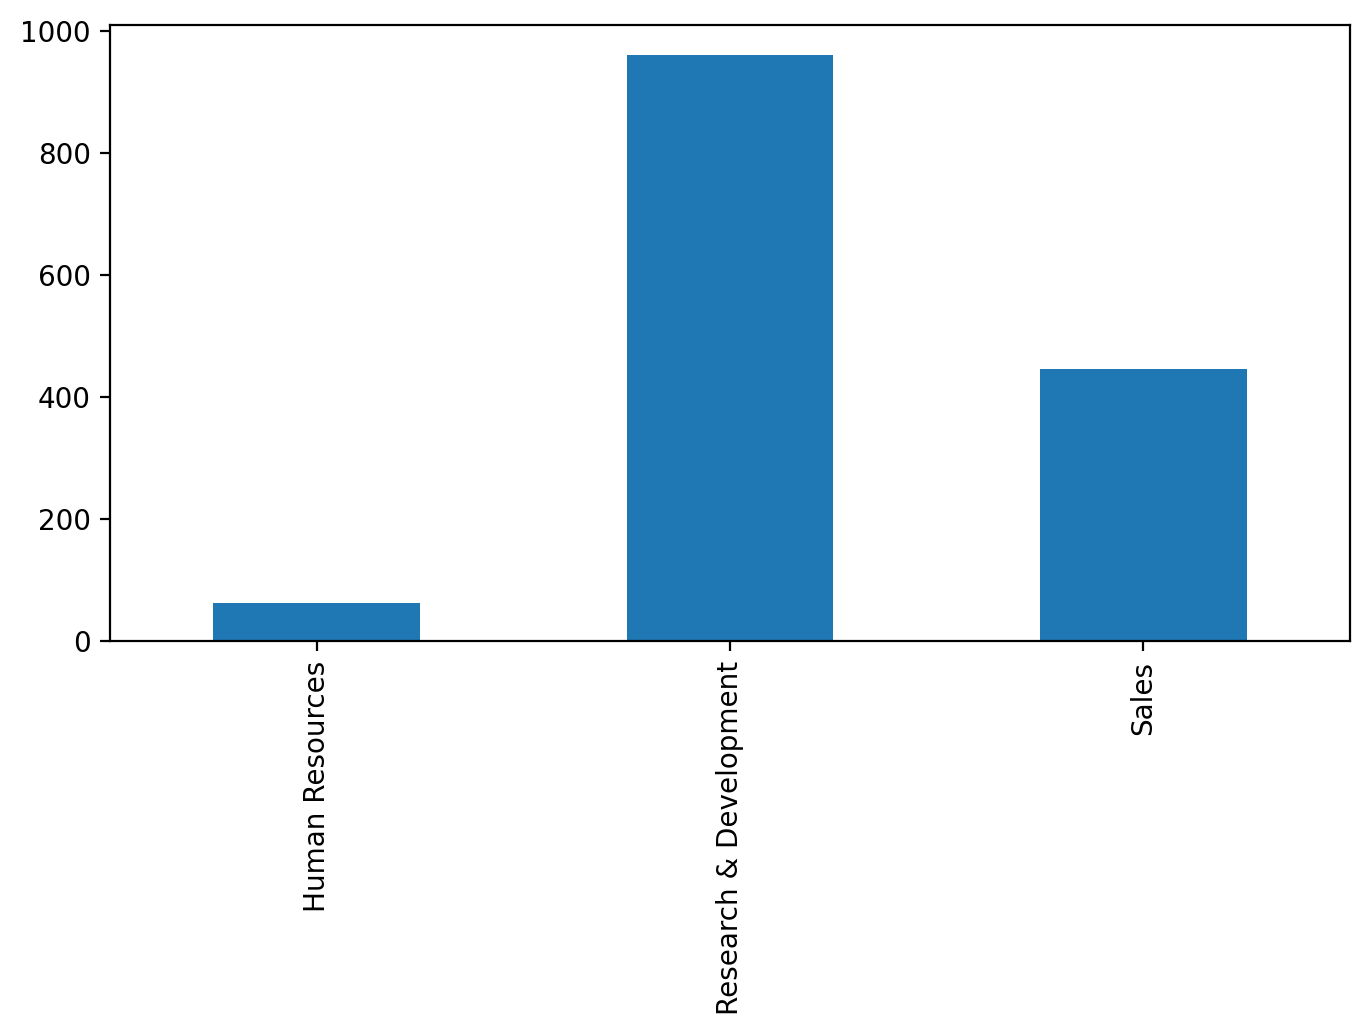

In [12]:
print(df.Department.value_counts())
df.Department.value_counts().sort_index().plot(kind='bar', figsize=(8, 4))

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


<Axes: >

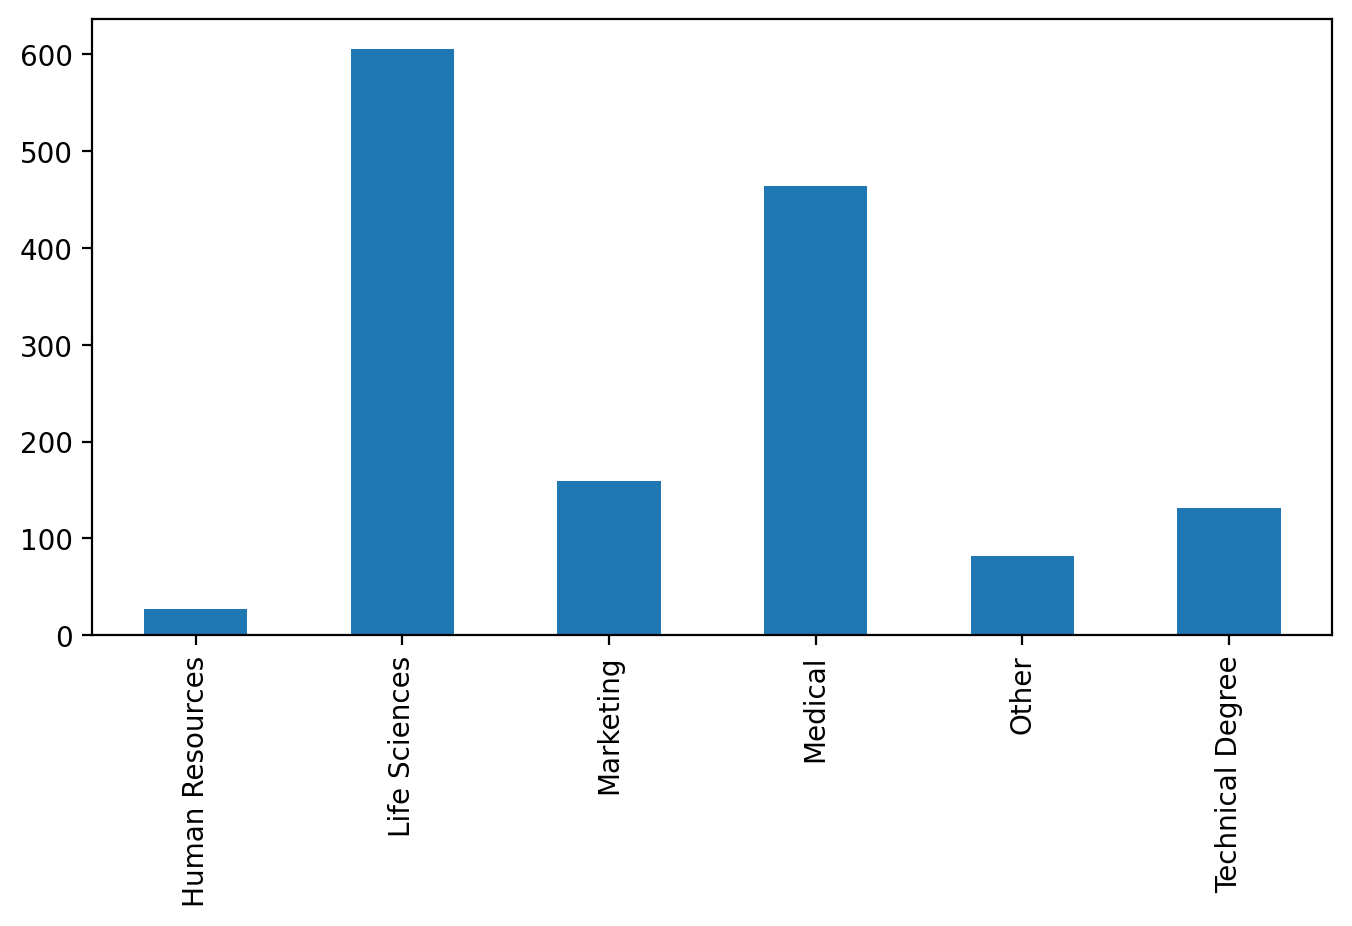

In [13]:
print(df.EducationField.value_counts())
df.EducationField.value_counts().sort_index().plot(kind='bar', figsize=(8, 4))

## Data Transformation for Categorical Variables

In [14]:
df1 = pd.get_dummies(df, ['Department', 'EducationField', 'MaritalStatus'])

## Correlation Matrix for all variables using a HeatMap

<Axes: >

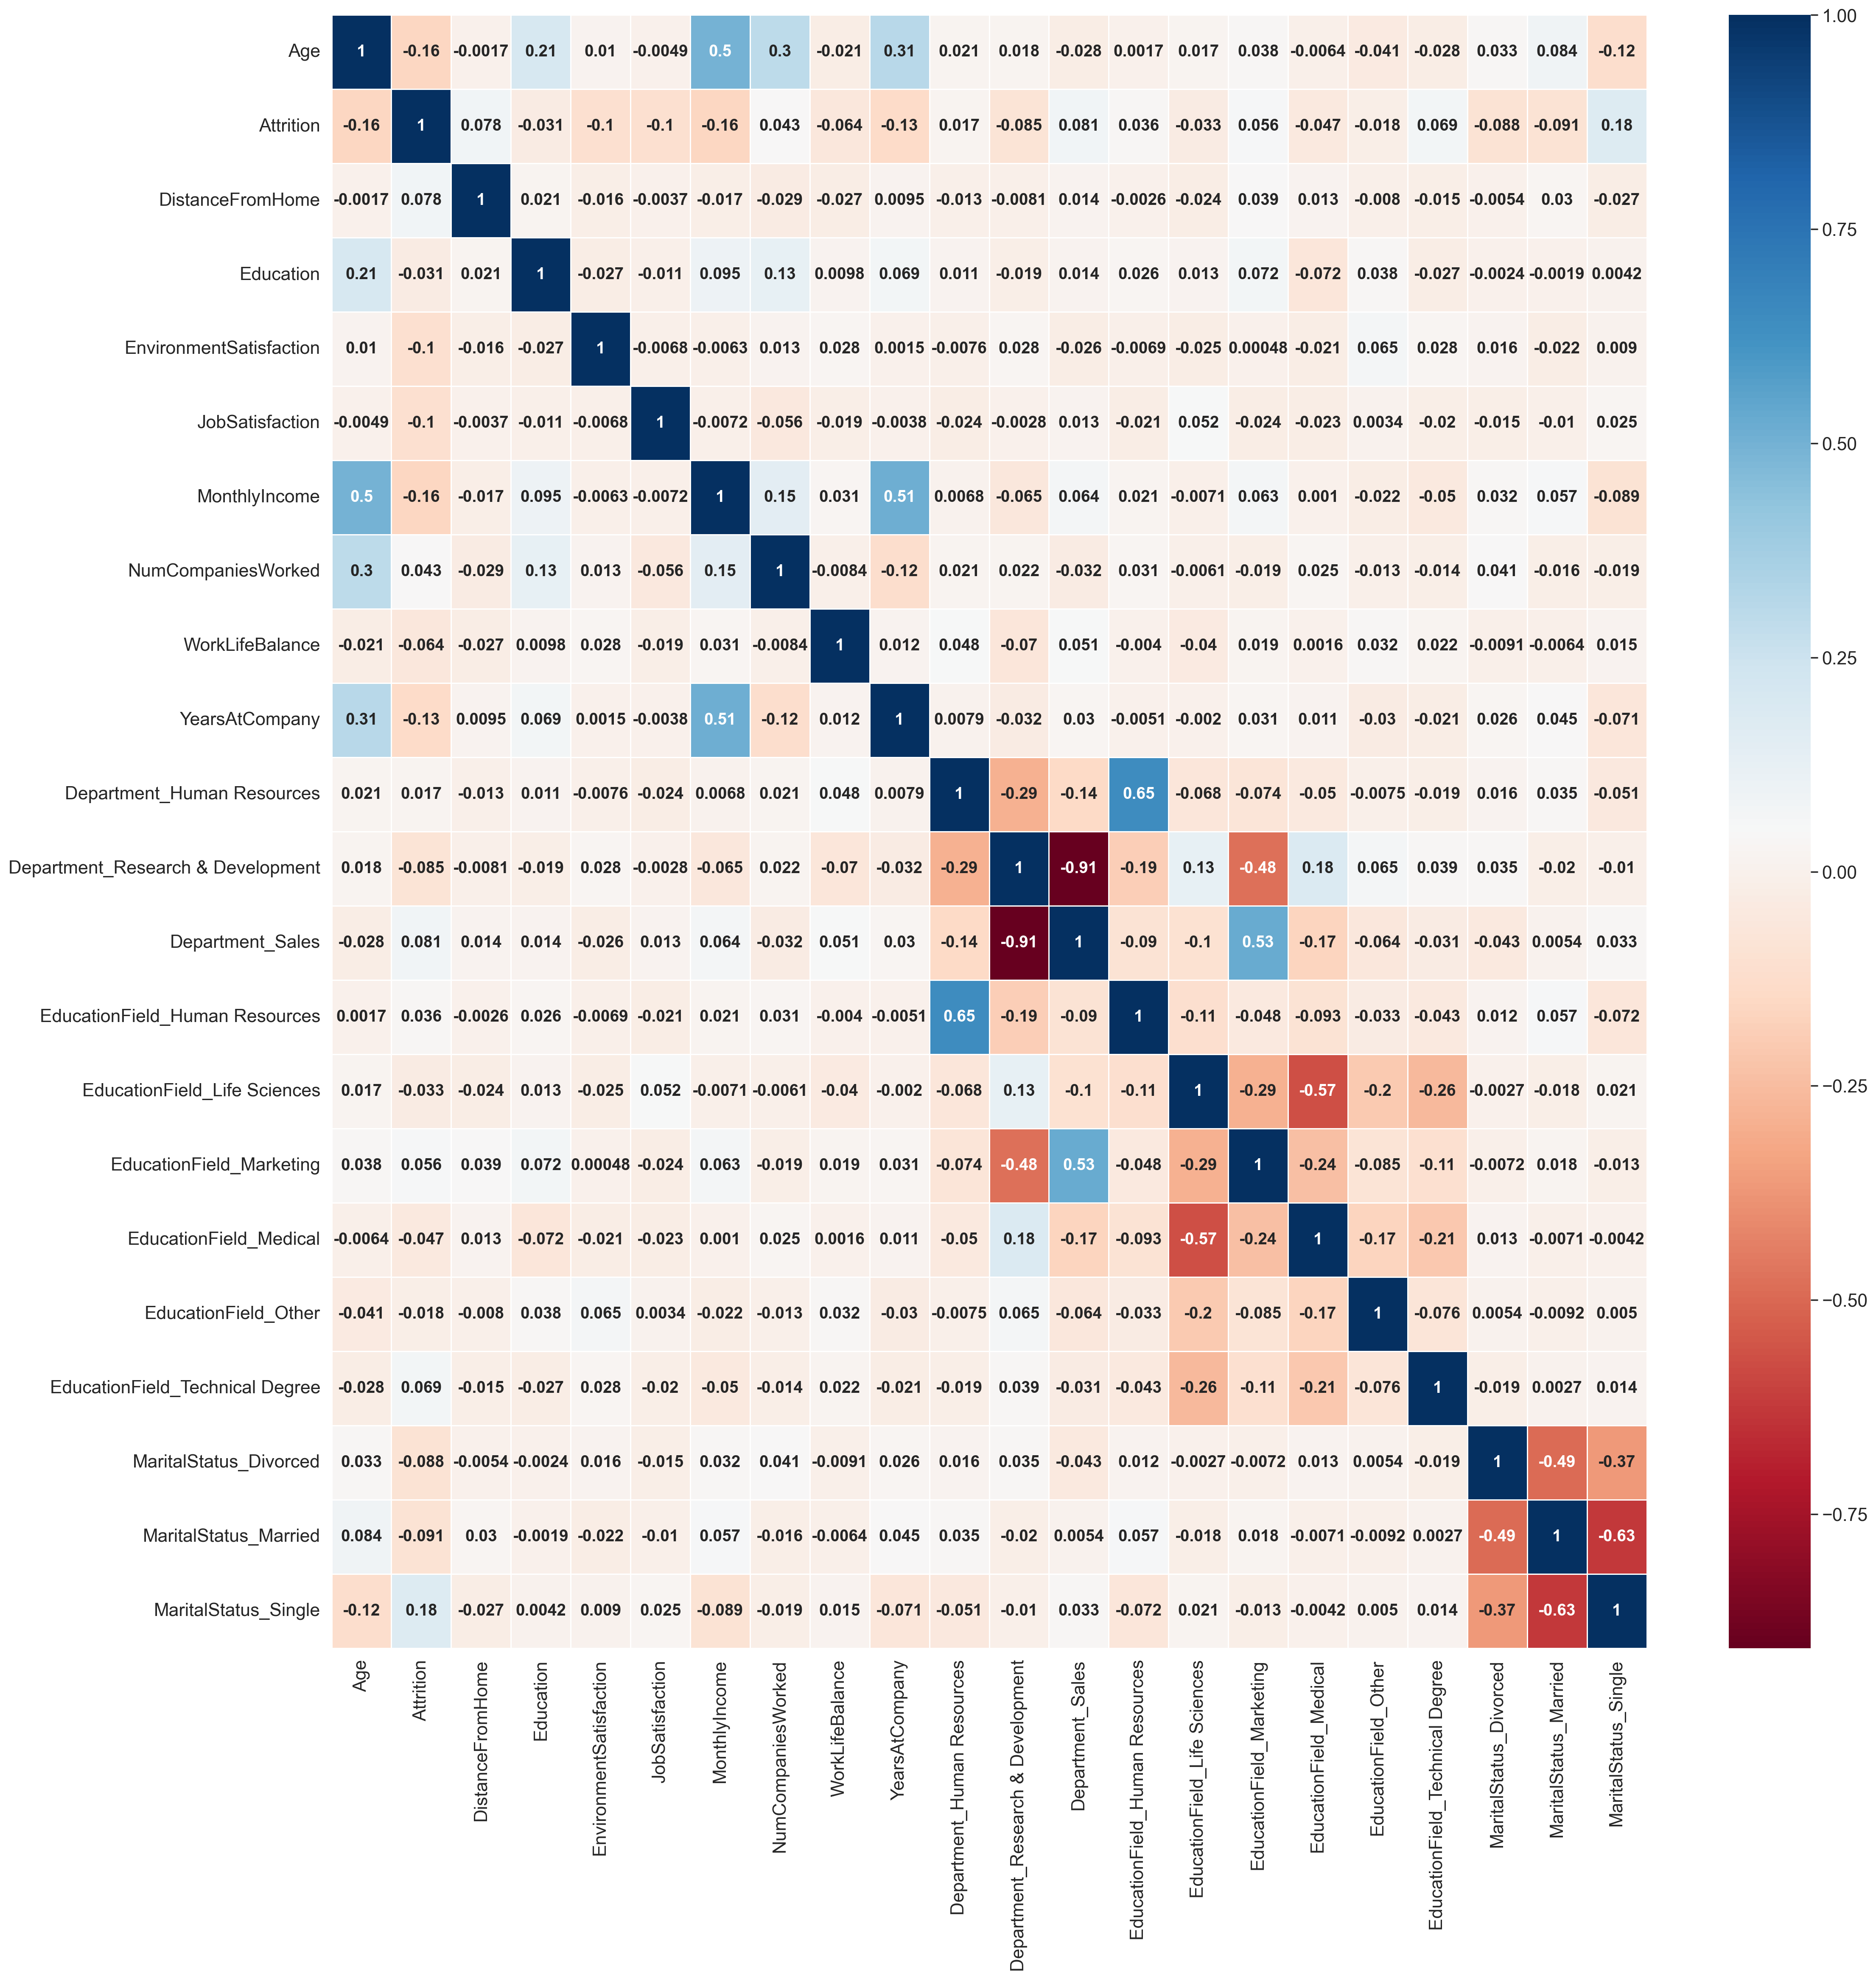

In [15]:
sns.set(rc={'figure.figsize':(25,25)})
sns.set(font_scale=1.4)
sns.heatmap(df1.corr(), 
            annot=True,
            linewidth=0.5,
            annot_kws={"size":14, "weight": "bold"},
            cmap="RdBu")


## What is correlated with Attrition?

- Closer to +1 and -1 are more important
- Or absolute high values

In [16]:
# Correleation of Attrition with everything else (sorted in desceding order of corr values)
df1.corrwith(df1['Attrition']).sort_values(ascending=False)

Attrition                            1.000000
MaritalStatus_Single                 0.175419
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
Department_Human Resources           0.016832
EducationField_Other                -0.017898
Education                           -0.031373
EducationField_Life Sciences        -0.032703
EducationField_Medical              -0.046999
WorkLifeBalance                     -0.063939
Department_Research & Development   -0.085293
MaritalStatus_Divorced              -0.087716
MaritalStatus_Married               -0.090984
EnvironmentSatisfaction             -0.103369
JobSatisfaction                     -0.103481
YearsAtCompany                      -0.134392
Age                                 -0.159205
MonthlyIncome                     

## Check how some of these correlated variables are related to Attrition, within each group?

<Axes: xlabel='MaritalStatus', ylabel='Count'>

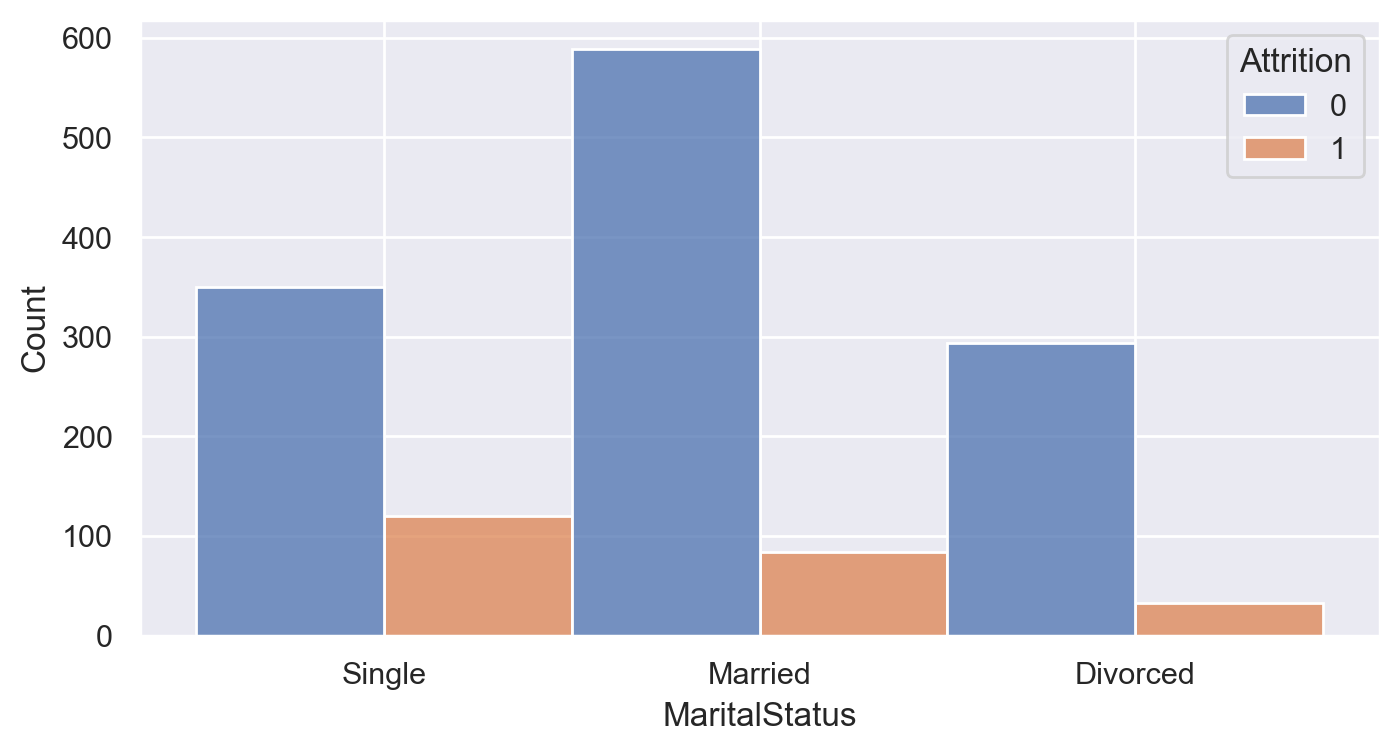

In [17]:
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(data=df, x="MaritalStatus", hue="Attrition", multiple="dodge")

In [18]:
df.groupby(by=['MaritalStatus'])['Attrition'].mean().sort_values(ascending=False).reset_index()

,MaritalStatus,Attrition
0,Single,0.255319
1,Married,0.124814
2,Divorced,0.100917


<Axes: xlabel='Department', ylabel='Count'>

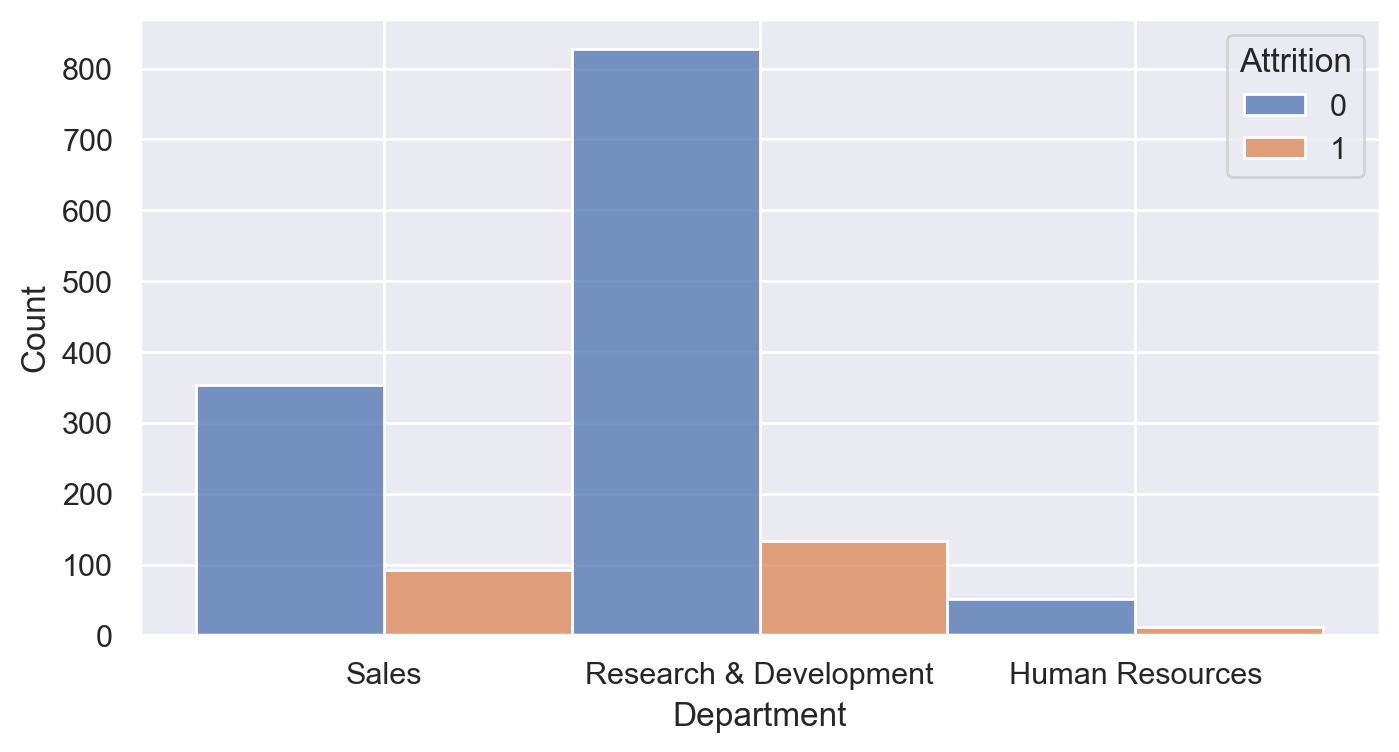

In [19]:
sns.histplot(data=df, x="Department", hue="Attrition", multiple="dodge")

In [20]:
df.groupby(by=['Department'])['Attrition'].mean().sort_values(ascending=False).reset_index()

,Department,Attrition
0,Sales,0.206278
1,Human Resources,0.190476
2,Research & Development,0.138398


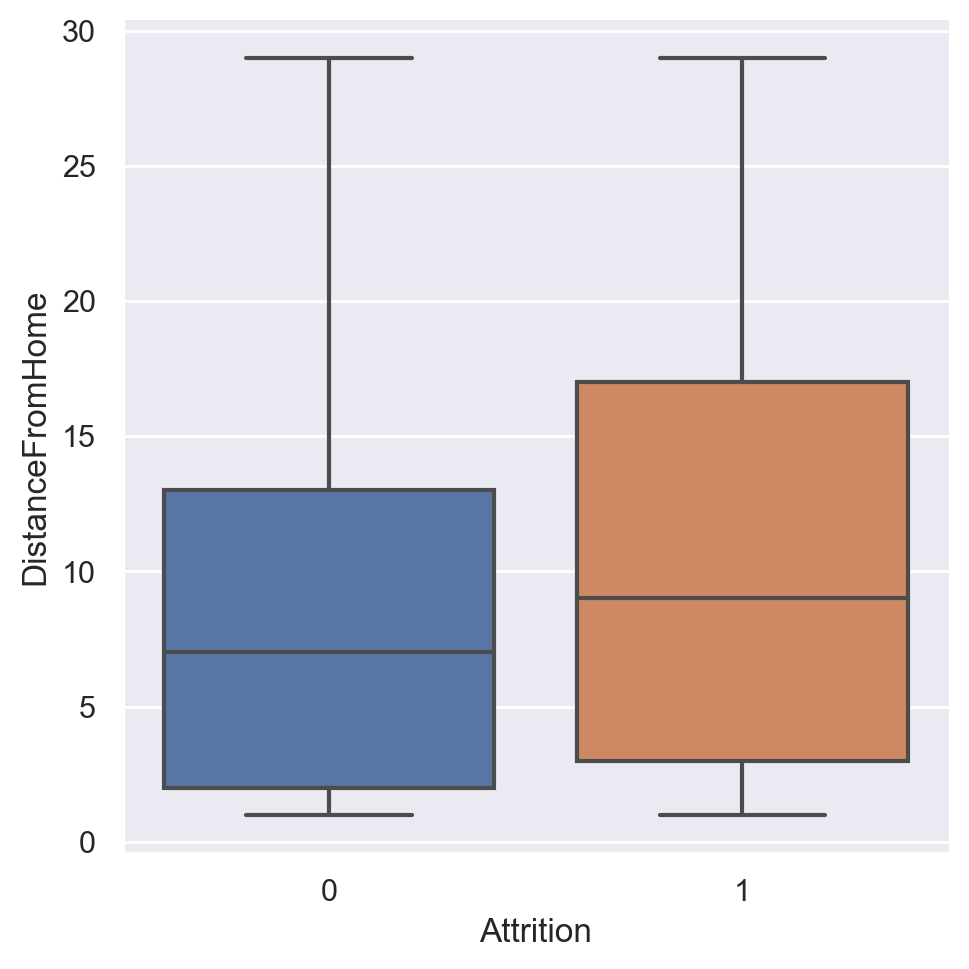

In [21]:
sns.catplot(data=df, x="Attrition", y="DistanceFromHome", kind="box")

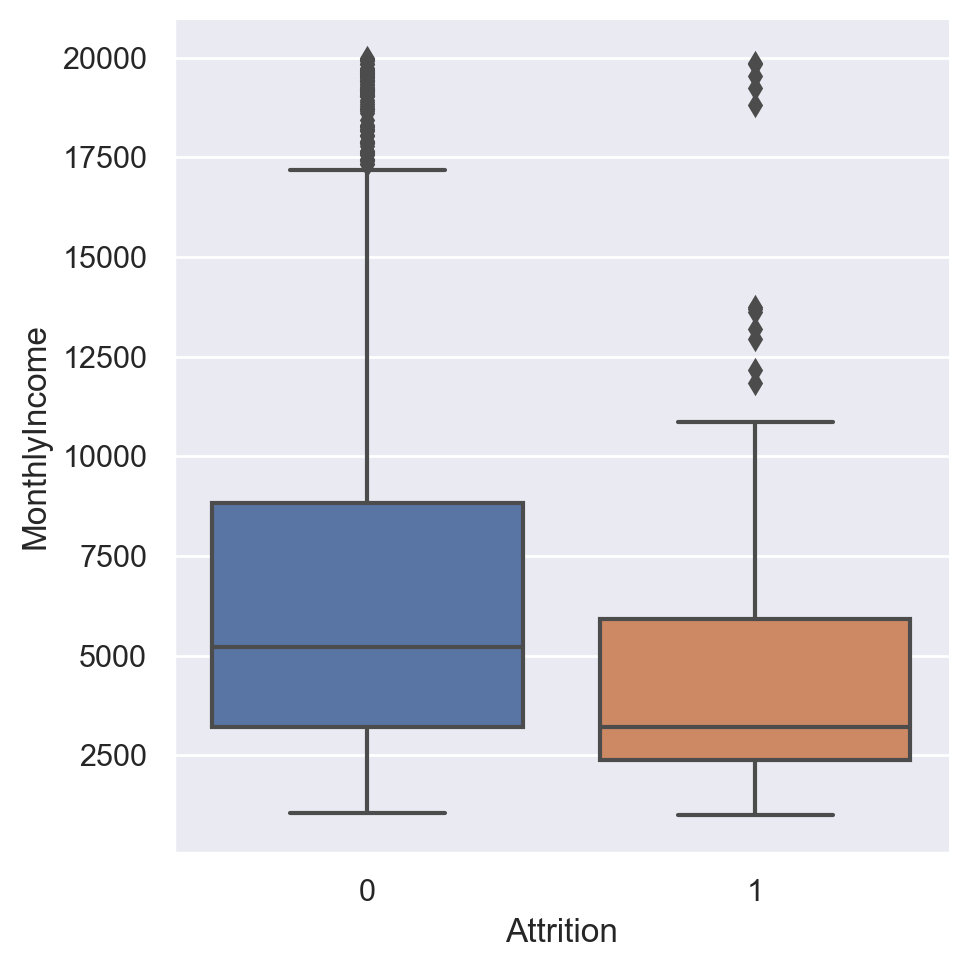

In [22]:
sns.catplot(data=df, x="Attrition", y="MonthlyIncome", kind="box")

### T-Test (One Tailed)

From the above plot it looks like monthly income of the group with attrition is lower, but is it stat sig? Lets do a T-Test to find out more.

- **Hypothesis: There is no difference between the monthly income of 2 groups**

- **Alternative Hypothesis: Monthly Income of the no-attrition group is higher than that of the attrition group (Pay can be a big reason for leaving a company)**

- **Type of Test: 1 sided T-Test**


In [23]:
# Mean, SD, Count (No Attrition Group)
m1, s1, n1 = df[df.Attrition == 0]['MonthlyIncome'].mean(), \
            df[df.Attrition == 0]['MonthlyIncome'].std(), \
            len(df[df.Attrition == 0])
m1, s1, n1

(6832.739659367397, 4818.208000784485, 1233)

In [24]:
# Mean, SD, Count (Attrition Group)
m2, s2, n2 = df[df.Attrition == 1]['MonthlyIncome'].mean(), \
            df[df.Attrition == 1]['MonthlyIncome'].std(), \
            len(df[df.Attrition == 1])
m2, s2, n2

(4787.0928270042195, 3640.2103671038512, 237)

In [25]:
t_stat = (m1-m2)/math.sqrt(s1**2/n1 + s2**2/n2)
t_stat

7.482621586644742

## Since, the t-statistic is way bigger than ~2, we can reject the null, at an alpha of 5% (even at 1%) and accept the alternative hypothesis that Monthly Income of employees who stays in the company is greater than that of the employees who leave

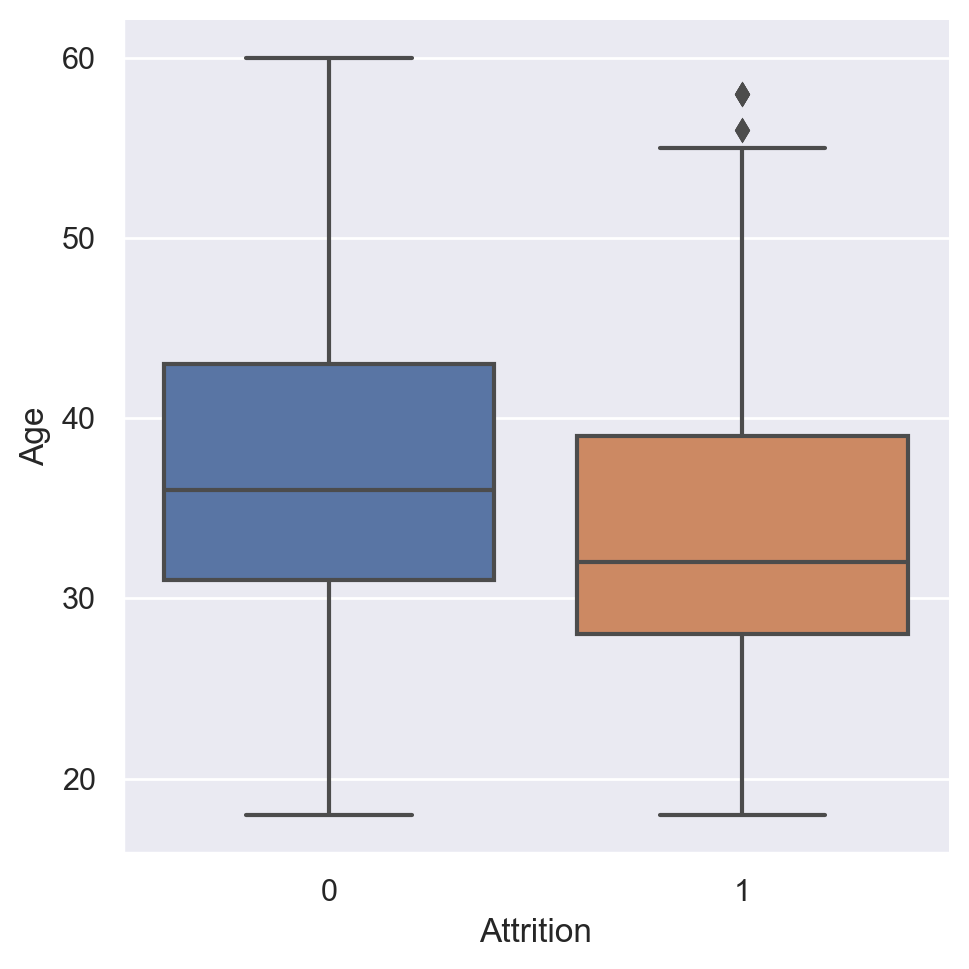

In [26]:
sns.catplot(data=df, x="Attrition", y="Age", kind="box")

<Axes: xlabel='EducationField', ylabel='Count'>

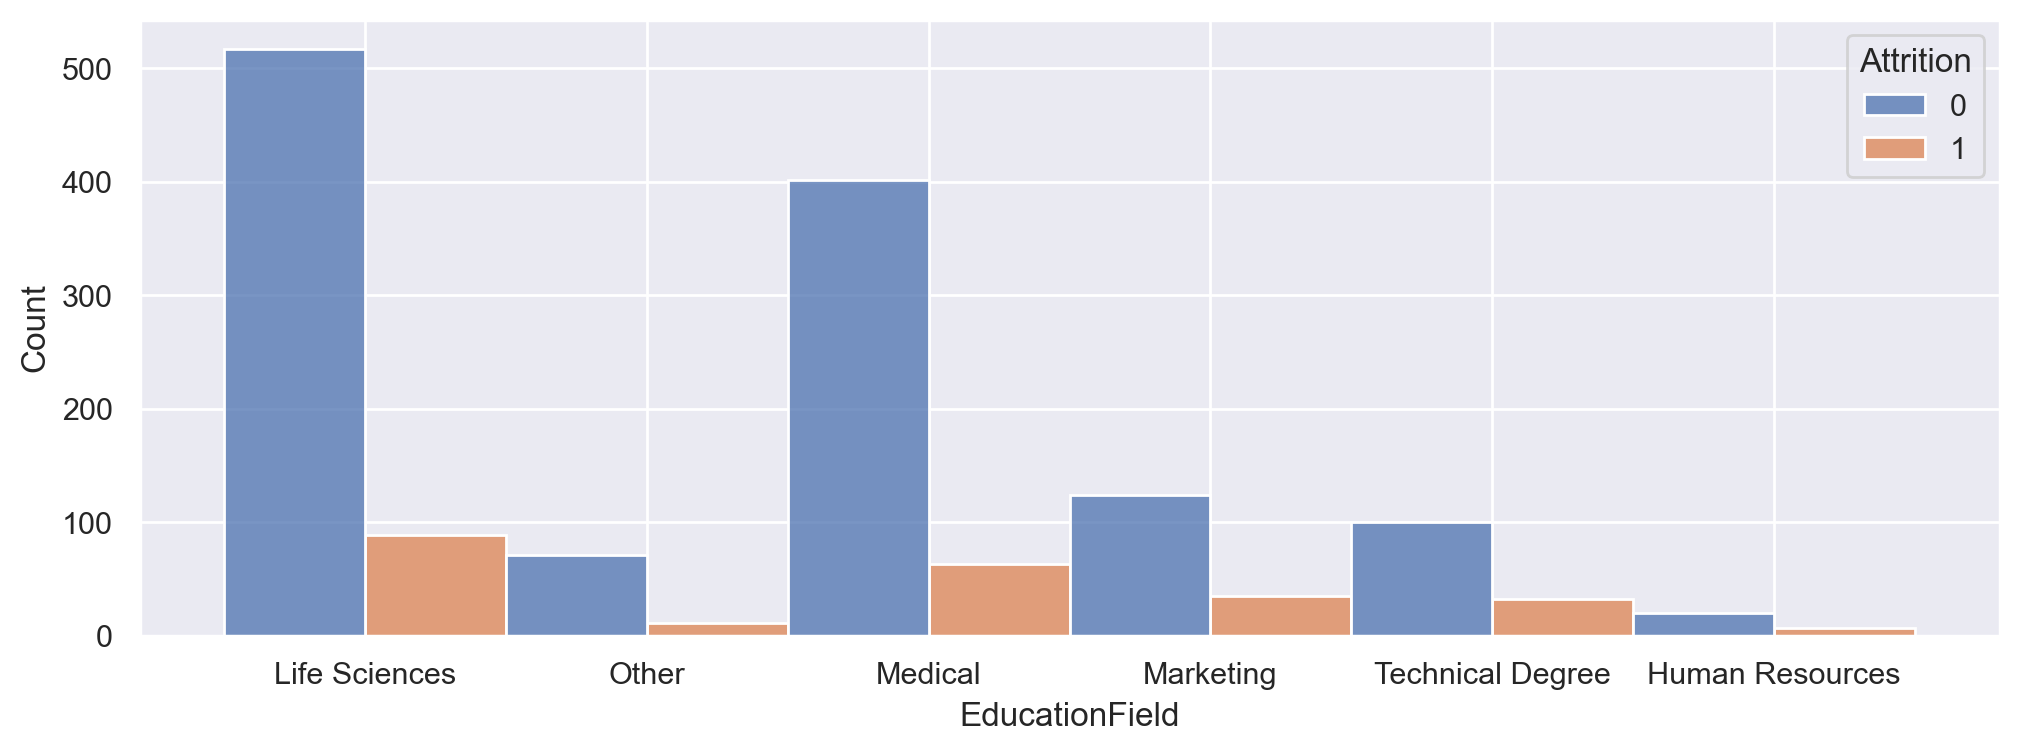

In [27]:
sns.set(rc={'figure.figsize':(12,4)})
sns.histplot(data=df, x="EducationField", hue="Attrition", multiple="dodge")

In [28]:
df.groupby(by=['EducationField'])['Attrition'].mean().sort_values(ascending=False).reset_index()

,EducationField,Attrition
0,Human Resources,0.259259
1,Technical Degree,0.242424
2,Marketing,0.220126
3,Life Sciences,0.146865
4,Medical,0.135776
5,Other,0.134146


# B. Inference
## What are some of the factors that might explain attrition?
### Using Logistic Regression

Ref (How to interpret odds, logodds, probability)
- https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [29]:
# Data transformation: create dummy variables for the categorical variables
df1 = pd.get_dummies(data=df, columns=['Department','Education','EducationField','MaritalStatus'])
df1.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Human Resources,...,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,4,5993,8,1,6,0,...,0,0,1,0,0,0,0,0,0,1
1,49,0,8,3,2,5130,1,3,10,0,...,0,0,1,0,0,0,0,0,1,0
2,37,1,2,4,3,2090,6,3,0,0,...,0,0,0,0,0,1,0,0,0,1
3,33,0,3,4,3,2909,1,3,8,0,...,0,0,1,0,0,0,0,0,1,0
4,27,0,2,1,2,3468,9,3,2,0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
"""
Features/DataTypes
Age                         int64
Attrition                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
"""
target = 'Attrition'
cols_num = [
            'Age', 
            'DistanceFromHome',
            'EnvironmentSatisfaction',
            'JobSatisfaction',
            'MonthlyIncome',
            'NumCompaniesWorked',
            'WorkLifeBalance',
            'YearsAtCompany'
           ]
cols_cat = [
            'Department',
            'Education',
            'EducationField',
            'MaritalStatus'
           ]

In [31]:
for col in cols_cat:
    print(f"### {col}:\n{df[col].value_counts()}\n")

### Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

### Education:
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

### EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

### MaritalStatus:
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64



In [32]:
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [33]:
encoded = encoder.fit_transform(df[cols_cat])
encoded[:5]

/Users/sayantansatpati/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0.]])

In [34]:
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols_cat))
one_hot_df.head()

,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
df[cols_num].head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,4,5993,8,1,6
1,49,8,3,2,5130,1,3,10
2,37,2,4,3,2090,6,3,0
3,33,3,4,3,2909,1,3,8
4,27,2,1,2,3468,9,3,2


In [36]:
X = pd.concat([df[cols_num], one_hot_df], axis=1)
y = df[target]
print(X.shape, y.shape)

(1470, 25) (1470,)


## Using sklearn Logistic Regression

In [37]:
# Initializing the Logistic Regression model
lr = LogisticRegression(solver='liblinear')

# Fitting the model on the training data
lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [38]:
print(f"Model Accuracy: {lr.score(X, y)}")

Model Accuracy: 0.8496598639455782


In [39]:
coefficients = lr.coef_[0]  # Extract coefficients
feature_names = X.columns  # Extract feature names

# Pairing coefficients with feature names
coefficients_df = pd.DataFrame({
                                'Feature': feature_names, 
                                'logodds': coefficients, 
                                'odds': np.exp(coefficients),
                                'probability': np.exp(coefficients) / (1+np.exp(coefficients))
                               })
print(f"\nIntercept: {lr.intercept_[0]}")
print(coefficients_df.sort_values(by=['probability'], ascending=False).reset_index(drop=True))


Intercept: 0.2793590733915659
                              Feature   logodds      odds  probability
0                MaritalStatus_Single  0.791123  2.205873     0.688072
1                    Department_Sales  0.359476  1.432579     0.588914
2     EducationField_Technical Degree  0.338162  1.402368     0.583744
3            EducationField_Marketing  0.197262  1.218063     0.549156
4                         Education_3  0.170040  1.185352     0.542408
5                  NumCompaniesWorked  0.116073  1.123078     0.528986
6      EducationField_Human Resources  0.111386  1.117826     0.527818
7                         Education_1  0.106992  1.112925     0.526722
8          Department_Human Resources  0.086068  1.089880     0.521504
9                         Education_2  0.052283  1.053674     0.513068
10                   DistanceFromHome  0.035183  1.035809     0.508795
11                        Education_4  0.002096  1.002098     0.500524
12                      MonthlyIncome -0.00010

# Interpretation of Logistic Regression coefficients 
## Ref (How to interpret odds, logodds, probability) 
https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/



$p = P\left(y=1\right)$

$1-p = P\left(y=0\right)$

**In Logistic Regression, logodds is a linear combination of features & weights:**

**logit or logodds(p)** = $log\left( \frac{p}{1-p} \right)$ = $\beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2 + ... + \beta_n \times x_n$ = $\beta X$


$\therefore$ **odds** = $\frac{p}{1-p}$ = $e^{\beta X}$

$\therefore$ **probablity** = $e^{\beta X} / (1 + e^{\beta X})$

Taking MaritalStatus_Single as an example: 

if MaritalStatus is Single: 

- **Increases the logit/logodds of attrition by 0.791123**
- **Increases the odds of attrition by 2.205873**
- **Increases the probability of attrition by 0.688072**

## Using statsmodel Logistic Regression (Another way)

In [40]:
logit_mod = sm.Logit(y, sm.add_constant(X))

In [41]:
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.377739
         Iterations 7


In [42]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                           21
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.1448
Time:                        06:56:00   Log-Likelihood:                -555.28
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.069e-29
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.0193   4.26e+06   2.39e-07      1.000   -8.34e+06    8.34e+06
Age                                  -0.0352      0.011     -3

# C. Prediction

### Approach-1: Using sklearn (boosted) Decision Tree: GradientBoostingClassifier

How well can we predict attrition using the features/independent variables?


In [43]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, test_size=0.2)

In [44]:
print(X_train.shape, y_train.shape, np.mean(y_train))
print(X_test.shape, y_test.shape, np.mean(y_test))

(1176, 25) (1176,) 0.1488095238095238
(294, 25) (294,) 0.2108843537414966


In [45]:
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=43)
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=43)

## Which features are most important in predicting attrition?

*This looks different compared to Logistic Regression we did before for inference since Decision Trees are Non-Linear compared Logistic Regression which is linear*

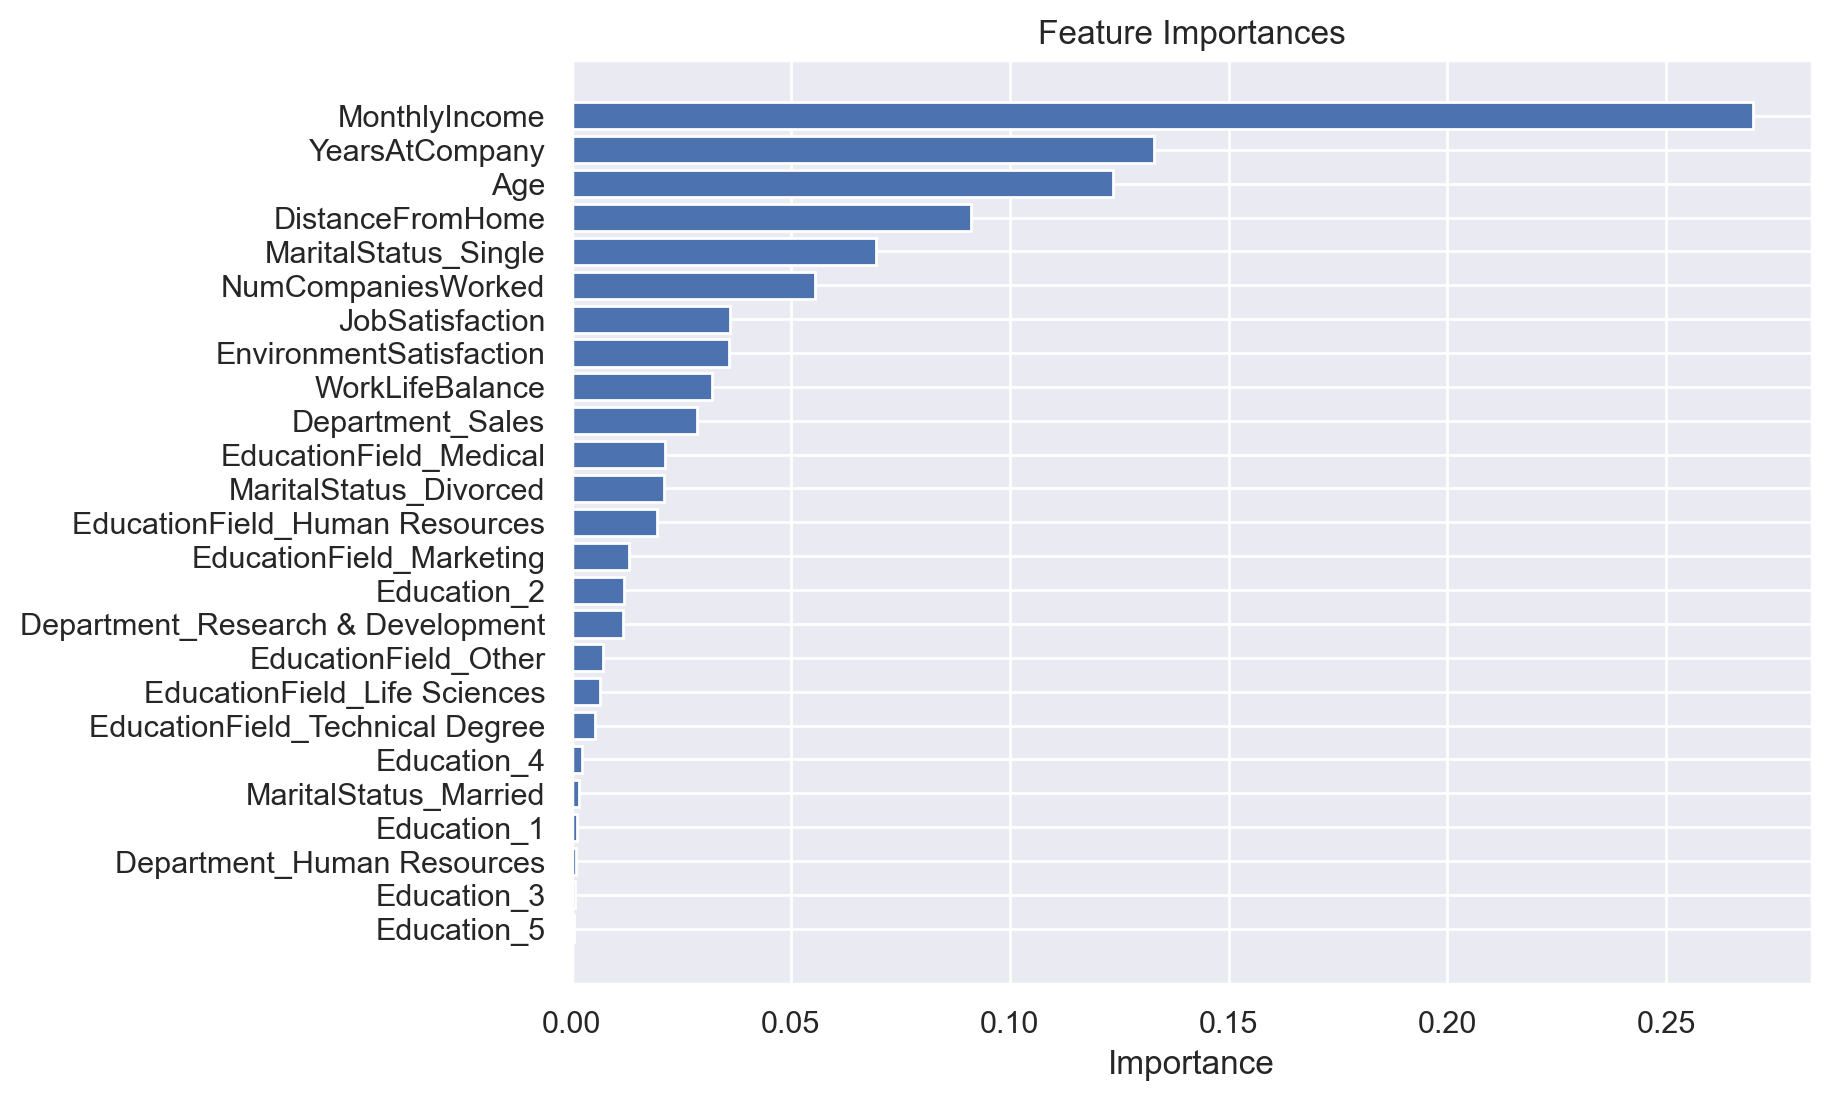

In [73]:
# Get feature importances
importances = gbdt.feature_importances_
feature_names = X.columns

# Create a sorted DataFrame of feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

# Plotting feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [74]:
y_preds = gbdt.predict(X_test)

In [78]:
print(f"accuracy: {accuracy_score(y_test, y_preds)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_preds)}")

accuracy: 0.8061224489795918
roc_auc_score: 0.5816879866518354


### ROC is 58% which means the classifier is better than a coin toss

### Classifier with 80% accuracy on test set (unseen data) looks okay but lets check how it is doing across the 2 classes: 0 (no attrition) and 1 (attrition)

In [79]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       232
           1       0.63      0.19      0.30        62

    accuracy                           0.81       294
   macro avg       0.72      0.58      0.59       294
weighted avg       0.78      0.81      0.76       294



### Classifier isn't doing that well for the +ve class. f1 score is 0.89 for negative class but only 0.30 for the +ve class. Possible things to try:

- Try hyper parameter tuning and come up with a better model
- High Bias. The features are not strong enough for predictions
- There is also a class imbalance problem that we can try to address using class weights or augment the data by a) gathering more positive labels or b) sythetically generate data (using LLM etc)

### Hyperparameter Tuning

In [48]:
# make lists of different parameters to check
parameters = {
    'n_estimators':[100,200,500,1000],
    'min_samples_split': [2,3,4],
    'learning_rate' : [0.1, 0.01],
    'max_depth' : [2,3,4,5]
  }

In [65]:
gbdt_tuned = GradientBoostingClassifier()
gbclf = GridSearchCV(gbdt_tuned, 
                    parameters,
                    scoring='f1',
                    n_jobs=-1)
gbclf.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='f1')

In [66]:
gbclf.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [67]:
print(classification_report(y_test, gbclf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       232
           1       0.50      0.27      0.35        62

    accuracy                           0.79       294
   macro avg       0.66      0.60      0.61       294
weighted avg       0.76      0.79      0.76       294



#### Using Hyperparameter tuning, the f1 score increased from 0.30 to 0.35 for the +ve class. But, there is still room to improve it more using the other approaches mentioned above.

In [69]:
cm = confusion_matrix(y_test, gbclf.predict(X_test), labels=gbclf.classes_)
print(cm)

[[215  17]
 [ 45  17]]


### Interpretation 

|Type |Number |Comments |
|:-----|:----:|:----:|
|True Pos |17 |. |
|False Pos |17 |. |
|True Neg |215 |. |
|False Neg |45 |Needs to be improved |

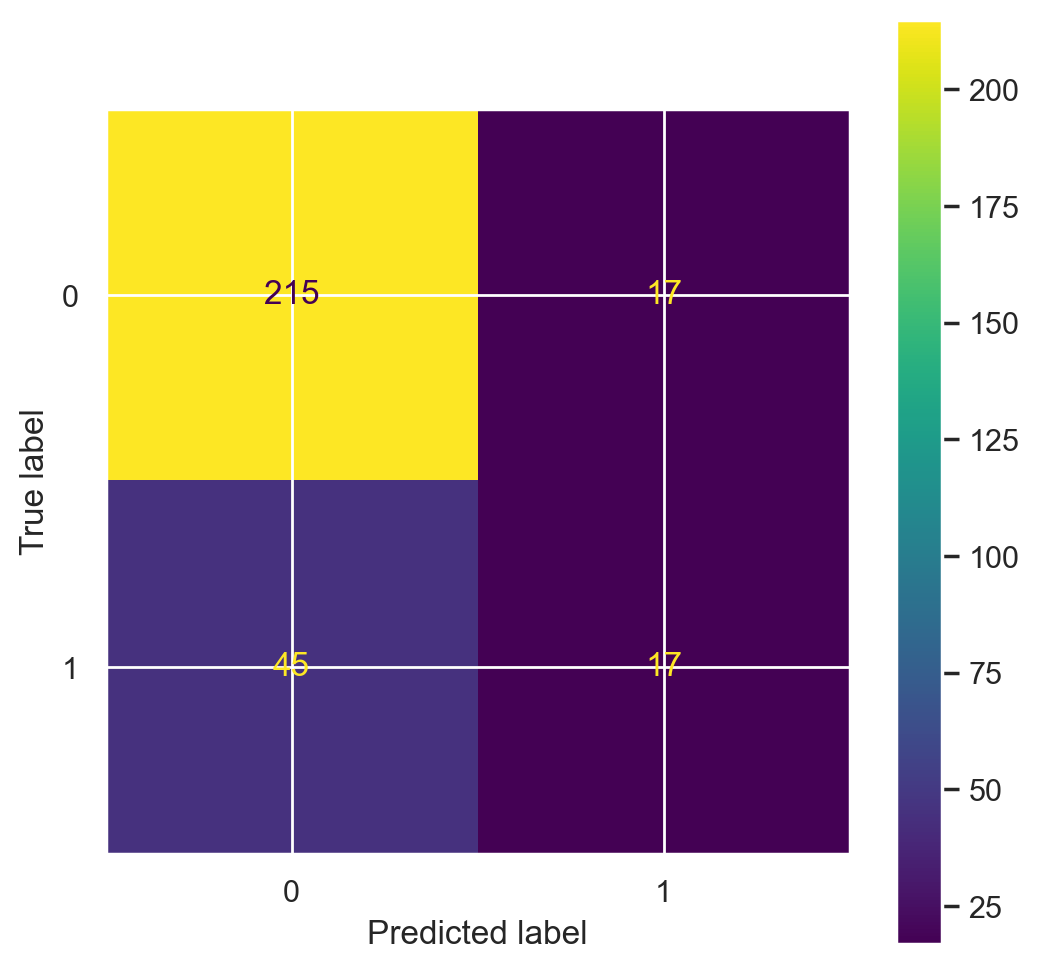

In [70]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=gbclf.classes_)
fig, ax = plt.subplots(figsize=(6,6))
cmd.plot(values_format='g', ax=ax)
plt.show()

### Approach-2: Using XGBoost Classifier

- Results are very similar

In [54]:
xgboost = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=43)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=43, ...)

In [55]:
y_preds = xgboost.predict(X_test)

In [56]:
print(f"Model Train Accuracy: {xgboost.score(X_train, y_train)}")
print(f"Model Test Accuracy: {xgboost.score(X_test, y_test)}")

Model Train Accuracy: 0.9438775510204082
Model Test Accuracy: 0.7925170068027211


In [57]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       232
           1       0.52      0.18      0.27        62

    accuracy                           0.79       294
   macro avg       0.67      0.57      0.57       294
weighted avg       0.75      0.79      0.75       294



### Approach-3: Using a simple deep neural network (Multi Layer Perceptron)

- After trying a bunch of parameters for learning rate, hidden layers etc, able to get a better classificaion f1 score for the +ve class, compared to the Decision Trees.
- For further improvement, optimal hyperparameters can be found using GridSearchCV

In [58]:
mlp = MLPClassifier(solver='adam', 
                    alpha=0.001,
                    learning_rate='adaptive',
                    hidden_layer_sizes=(100,100,50,25),
                    batch_size=64,
                    max_iter=100,
                    random_state=43,
                    #early_stopping=True,
                    verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 10.09043888
Iteration 2, loss = 6.64985001
Iteration 3, loss = 3.66494193
Iteration 4, loss = 2.44669554
Iteration 5, loss = 3.17803886
Iteration 6, loss = 4.12481979
Iteration 7, loss = 2.91134356
Iteration 8, loss = 2.98903230
Iteration 9, loss = 3.37804555
Iteration 10, loss = 3.12777641
Iteration 11, loss = 1.68700386
Iteration 12, loss = 3.23422935
Iteration 13, loss = 3.10207665
Iteration 14, loss = 1.68474086
Iteration 15, loss = 3.20990257
Iteration 16, loss = 3.32573794
Iteration 17, loss = 2.95218799
Iteration 18, loss = 3.70016118
Iteration 19, loss = 3.42019223
Iteration 20, loss = 2.70222671
Iteration 21, loss = 2.60439685
Iteration 22, loss = 3.61628409
Iteration 23, loss = 2.41676335
Iteration 24, loss = 1.04943688
Iteration 25, loss = 2.66362191
Iteration 26, loss = 1.94811421
Iteration 27, loss = 1.98644043
Iteration 28, loss = 1.00426206
Iteration 29, loss = 1.68905870
Iteration 30, loss = 0.72340990
Iteration 31, loss = 2.50041676
Iteration 32, lo

MLPClassifier(alpha=0.001, batch_size=64, hidden_layer_sizes=(100, 100, 50, 25),
              learning_rate='adaptive', max_iter=100, random_state=43,
              verbose=True)

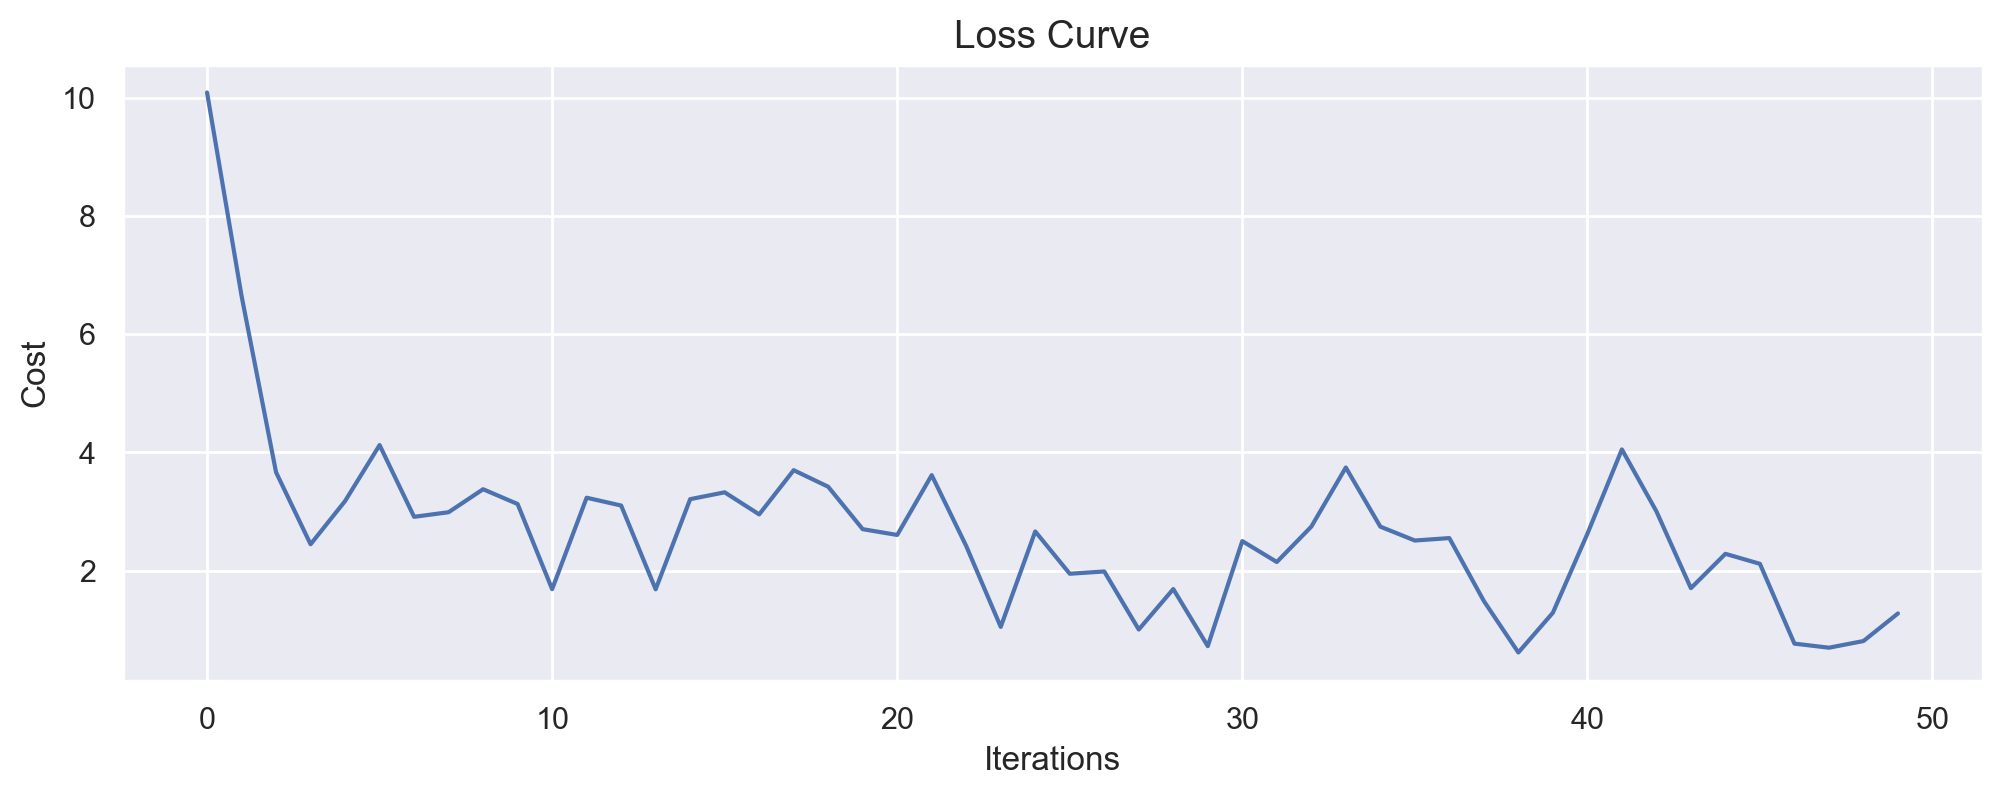

In [59]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [60]:
y_preds = mlp.predict(X_test)

In [61]:
print(f"Model Train Accuracy: {mlp.score(X_train, y_train)}")
print(f"Model Test Accuracy: {mlp.score(X_test, y_test)}")

Model Train Accuracy: 0.7678571428571429
Model Test Accuracy: 0.7414965986394558


In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       232
           1       0.38      0.34      0.36        62

    accuracy                           0.74       294
   macro avg       0.60      0.59      0.60       294
weighted avg       0.73      0.74      0.74       294

